In [1]:
import pandas as pd

In [3]:
import gseapy as gp

In [4]:
import networkx as nx

In [5]:
from itertools import chain, repeat

In [6]:
import math

1.	Realizar a análise de Enriquecimento usando o método GSEA:

In [7]:
down = pd.read_csv("Sup-Table-4-List_of_Down_regulated_Erosion_vs_Without-Erosion.csv")

In [8]:
down.head()

,Ensembl.ID,Gene_name,log2FoldChange,padj
0,ENSG00000131845,ZNF304,-0.585086,0.029046
1,ENSG00000156502,SUPV3L1,-0.586085,0.001891
2,ENSG00000154781,CCDC174,-0.588956,0.008869
3,ENSG00000088038,CNOT3,-0.588963,0.036274
4,ENSG00000141367,CLTC,-0.590050,0.000862


In [9]:
# Podemos ver os "gene sets" que estão incluídos no gseapy. Alguns deles não estão atualizados
#Portanto, nesta tarefa vamos usar um arquivo gmt baixado do MSigDB (https://www.gsea-msigdb.org/gsea/msigdb/)
gp.get_library_name()[:10]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021']

In [10]:
down.iloc[:, 1:3]

,Gene_name,log2FoldChange
0,ZNF304,-0.585086
1,SUPV3L1,-0.586085
2,CCDC174,-0.588956
3,CNOT3,-0.588963
4,CLTC,-0.590050
...,...,...
1046,AHNAK2,-7.266606
1047,RAB3B,-7.360638
1048,PRRX1,-8.452209
1049,LARP6,-8.603596


In [13]:
# Executar a análise de enriquecimento
# O Enrichr usa o Fisher exact test
#del enrichr_down

In [11]:
enr = gp.enrichr(gene_list=down.Gene_name,gene_sets=['gene_sets_GOBP.gmt'], outdir=None) 

#enr = gp.enrichr(gene_list=down.Gene_name,gene_sets=['Reactome_2022', "h.all.v2023.2.Hs.symbols.gmt"], outdir=None) # Para usar a versão do mesmo arquivo gmt do gseapy.get_library_name()

#resultado da análise

enrichr_down = enr.results

enrichr_down.head()


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes
0,gene_sets_GOBP.gmt,GOBP_APICAL_PROTEIN_LOCALIZATION,2/15,0.291213,0.865932,2.410737,2.974129,SHROOM3;DLG5
1,gene_sets_GOBP.gmt,GOBP_APOLIPOPROTEIN_A_I_MEDIATED_SIGNALING_PAT...,1/7,0.404785,0.865932,3.001380,2.714447,ABCA1
2,gene_sets_GOBP.gmt,GOBP_APOPTOTIC_CELL_CLEARANCE,3/48,0.676549,0.974958,0.998460,0.390148,C3;AXL;TYRO3
3,gene_sets_GOBP.gmt,GOBP_APOPTOTIC_CHROMOSOME_CONDENSATION,1/6,0.358971,0.865932,3.547630,3.634595,TOP2A
4,gene_sets_GOBP.gmt,GOBP_APOPTOTIC_MITOCHONDRIAL_CHANGES,5/109,0.897841,0.999951,0.679661,0.073242,SLC25A4;LMNA;NOL3;CAMK2A;MLLT11


In [12]:
# somente os resultados estatisticamente significativos
enrichr_down = enrichr_down[enrichr_down["Adjusted P-value"]<0.05]

enrichr_down.reset_index(drop=True, inplace=True)
enrichr_down

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes
0,gene_sets_GOBP.gmt,GOBP_APPENDAGE_DEVELOPMENT,30/182,0.000012,0.000981,2.699048,30.670483,SMOC1;LARGE1;B9D1;GREM1;TBX2;ASPH;TWIST1;CACNA...
1,gene_sets_GOBP.gmt,GOBP_AXON_DEVELOPMENT,62/513,0.000019,0.001004,1.909859,20.718550,ARHGEF28;ENAH;SEMA3A;CDH2;PLPPR4;OLIG2;NRP2;MA...
2,gene_sets_GOBP.gmt,GOBP_CELL_CELL_SIGNALING_BY_WNT,57/462,0.000024,0.001004,1.949077,20.752485,GRB10;BICC1;WWTR1;CDH2;RSPO3;MCC;LRP6;SDC1;GRE...
3,gene_sets_GOBP.gmt,GOBP_INTEGRIN_MEDIATED_SIGNALING_PATHWAY,17/113,0.002558,0.048041,2.402710,14.340272,DOCK1;PTN;PRKD1;LAMA5;FERMT2;BCAR1;COL16A1;LAM...
4,gene_sets_GOBP.gmt,GOBP_OSSIFICATION,57/443,0.000007,0.000981,2.051237,24.447882,LOX;IGFBP3;THRA;WWTR1;COL5A2;SMOC1;ENPP1;MRC2;...
5,gene_sets_GOBP.gmt,GOBP_OSTEOBLAST_DIFFERENTIATION,33/257,0.000650,0.013740,2.003750,14.703343,LOX;IGFBP3;WWTR1;SMOC1;MRC2;GREM1;TWIST1;WNT4;...
6,gene_sets_GOBP.gmt,GOBP_REGULATION_OF_CANONICAL_WNT_SIGNALING_PAT...,34/262,0.000444,0.010728,2.030478,15.672943,BICC1;WWTR1;CDH2;RSPO3;MCC;GREM1;LZTS2;GPRC5B;...
7,gene_sets_GOBP.gmt,GOBP_REGULATION_OF_WNT_SIGNALING_PATHWAY,42/339,0.000270,0.008182,1.933147,15.886940,GRB10;BICC1;WWTR1;CDH2;RSPO3;MCC;GREM1;LZTS2;G...
8,gene_sets_GOBP.gmt,GOBP_VASCULATURE_DEVELOPMENT,85/832,0.000290,0.008182,1.583941,12.899540,LOX;EPN2;CDH2;PDGFB;PLCD3;B9D1;HMGA2;TBX2;TWIS...


In [13]:
type(enrichr_down)


pandas.core.frame.DataFrame

In [18]:
enrichr_down.replace('GOBP_', '', regex=True, inplace=True)
enrichr_down.replace('_', ' ', regex=True, inplace=True)
enrichr_down

/tmp/ipykernel_27125/1093617885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrichr_down.replace('GOBP_', '', regex=True, inplace=True)
/tmp/ipykernel_27125/1093617885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrichr_down.replace('_', ' ', regex=True, inplace=True)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes
0,gene sets GOBP.gmt,APPENDAGE DEVELOPMENT,30/182,0.000012,0.000981,2.699048,30.670483,SMOC1;LARGE1;B9D1;GREM1;TBX2;ASPH;TWIST1;CACNA...
1,gene sets GOBP.gmt,AXON DEVELOPMENT,62/513,0.000019,0.001004,1.909859,20.718550,ARHGEF28;ENAH;SEMA3A;CDH2;PLPPR4;OLIG2;NRP2;MA...
2,gene sets GOBP.gmt,CELL CELL SIGNALING BY WNT,57/462,0.000024,0.001004,1.949077,20.752485,GRB10;BICC1;WWTR1;CDH2;RSPO3;MCC;LRP6;SDC1;GRE...
3,gene sets GOBP.gmt,INTEGRIN MEDIATED SIGNALING PATHWAY,17/113,0.002558,0.048041,2.402710,14.340272,DOCK1;PTN;PRKD1;LAMA5;FERMT2;BCAR1;COL16A1;LAM...
4,gene sets GOBP.gmt,OSSIFICATION,57/443,0.000007,0.000981,2.051237,24.447882,LOX;IGFBP3;THRA;WWTR1;COL5A2;SMOC1;ENPP1;MRC2;...
5,gene sets GOBP.gmt,OSTEOBLAST DIFFERENTIATION,33/257,0.000650,0.013740,2.003750,14.703343,LOX;IGFBP3;WWTR1;SMOC1;MRC2;GREM1;TWIST1;WNT4;...
6,gene sets GOBP.gmt,REGULATION OF CANONICAL WNT SIGNALING PATHWAY,34/262,0.000444,0.010728,2.030478,15.672943,BICC1;WWTR1;CDH2;RSPO3;MCC;GREM1;LZTS2;GPRC5B;...
7,gene sets GOBP.gmt,REGULATION OF WNT SIGNALING PATHWAY,42/339,0.000270,0.008182,1.933147,15.886940,GRB10;BICC1;WWTR1;CDH2;RSPO3;MCC;GREM1;LZTS2;G...
8,gene sets GOBP.gmt,VASCULATURE DEVELOPMENT,85/832,0.000290,0.008182,1.583941,12.899540,LOX;EPN2;CDH2;PDGFB;PLCD3;B9D1;HMGA2;TBX2;TWIS...


In [15]:
# A coluna Genes indica os genes associados com as vias
# Vamos passar essa informação para um DataFrame com duas colunas (uma via ==> um gene)

pathways = {}

In [16]:
for ind in enrichr_down.index:
    
    path = enrichr_down.iloc[ind, 1]
    genes = enrichr_down.loc[ind, "Genes"]

    genes = genes.strip().split(";")

    pathways[path] = genes

    #if len(genes) < 5:
        
        #break
    #else:
        #pathways[path] = genes

    df = pd.DataFrame.from_records(
        chain.from_iterable(zip(repeat(k), v) for k, v in pathways.items()),
        columns=["geneset", "genesymbol"],
    )    

In [17]:
df.head()

,geneset,genesymbol
0,APPENDAGE DEVELOPMENT,SMOC1
1,APPENDAGE DEVELOPMENT,LARGE1
2,APPENDAGE DEVELOPMENT,B9D1
3,APPENDAGE DEVELOPMENT,GREM1
4,APPENDAGE DEVELOPMENT,TBX2


2. rede das vias enriquecidas

In [40]:
G = nx.Graph() # Crear um grafo non direcionado 

In [41]:
# adicionar nós
G.add_nodes_from(df['geneset'])

In [42]:
G.add_nodes_from(df['genesymbol'])

In [43]:
# Definir as arestas
edges = [(row['geneset'], row['genesymbol']) for index, row in df.iterrows()]

In [44]:
edges[:20]

[('APPENDAGE DEVELOPMENT', 'ZNF219'),
 ('APPENDAGE DEVELOPMENT', 'OSR2'),
 ('APPENDAGE DEVELOPMENT', 'SCX'),
 ('APPENDAGE DEVELOPMENT', 'TBX2'),
 ('APPENDAGE DEVELOPMENT', 'SMOC1'),
 ('APPENDAGE DEVELOPMENT', 'INTU'),
 ('APPENDAGE DEVELOPMENT', 'CIBAR1'),
 ('APPENDAGE DEVELOPMENT', 'MSX1'),
 ('APPENDAGE DEVELOPMENT', 'SLC7A11'),
 ('APPENDAGE DEVELOPMENT', 'TULP3'),
 ('APPENDAGE DEVELOPMENT', 'CACNA1C'),
 ('APPENDAGE DEVELOPMENT', 'RPGRIP1L'),
 ('APPENDAGE DEVELOPMENT', 'TFAP2A'),
 ('APPENDAGE DEVELOPMENT', 'ASPH'),
 ('APPENDAGE DEVELOPMENT', 'PTCH1'),
 ('APPENDAGE DEVELOPMENT', 'BMP4'),
 ('APPENDAGE DEVELOPMENT', 'RARG'),
 ('APPENDAGE DEVELOPMENT', 'PITX1'),
 ('APPENDAGE DEVELOPMENT', 'ZNRF3'),
 ('APPENDAGE DEVELOPMENT', 'NOG')]

In [45]:
#adicionar as arestas
G.add_edges_from(edges)

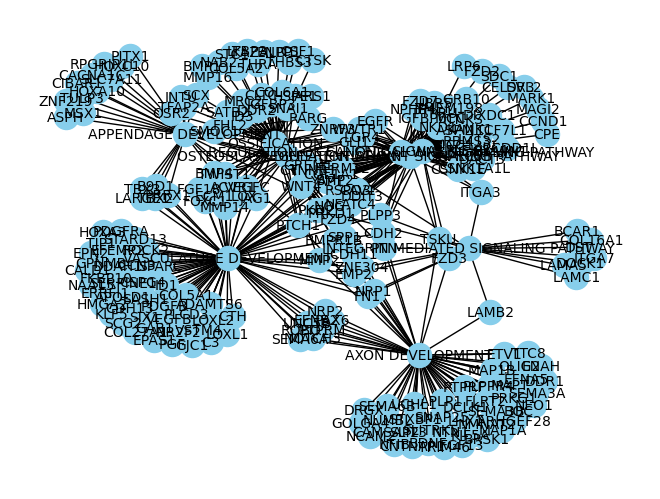

In [46]:
import matplotlib.pyplot as plt
# definir o layout
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_color='black')
# Mostrar o grafo
plt.show()

In [48]:
nx.write_gml(G, "Down_regulated_network.gml")

In [50]:
# Podemos calcular o degree
degree_centrality = {}

for node in G.nodes():
    degree_centrality[node] = len(list(G.neighbors(node)))

degree_centrality

{'APPENDAGE DEVELOPMENT': 30,
 'AXON DEVELOPMENT': 62,
 'CELL CELL SIGNALING BY WNT': 57,
 'INTEGRIN MEDIATED SIGNALING PATHWAY': 17,
 'OSSIFICATION': 57,
 'OSTEOBLAST DIFFERENTIATION': 33,
 'REGULATION OF CANONICAL WNT SIGNALING PATHWAY': 34,
 'REGULATION OF WNT SIGNALING PATHWAY': 42,
 'VASCULATURE DEVELOPMENT': 85,
 'ZNF219': 1,
 'OSR2': 2,
 'SCX': 2,
 'TBX2': 2,
 'SMOC1': 3,
 'INTU': 2,
 'CIBAR1': 1,
 'MSX1': 1,
 'SLC7A11': 1,
 'TULP3': 1,
 'CACNA1C': 1,
 'RPGRIP1L': 1,
 'TFAP2A': 2,
 'ASPH': 1,
 'PTCH1': 4,
 'BMP4': 4,
 'RARG': 2,
 'PITX1': 1,
 'ZNRF3': 4,
 'NOG': 8,
 'B9D1': 2,
 'GREM1': 7,
 'FERMT2': 5,
 'CTNNB1': 7,
 'TWIST1': 4,
 'LARGE1': 2,
 'HOXA10': 1,
 'HOXC10': 1,
 'PRRX1': 2,
 'TBX3': 2,
 'DRGX': 1,
 'OLIG2': 1,
 'NUMBL': 1,
 'STXBP1': 1,
 'MMP2': 3,
 'NFIB': 1,
 'TSKU': 3,
 'SLIT3': 1,
 'FN1': 3,
 'SPP1': 3,
 'NTN1': 1,
 'PRKG1': 1,
 'UCHL1': 1,
 'CDH2': 5,
 'PLPPR4': 1,
 'ROBO1': 2,
 'FLRT2': 1,
 'FZD3': 2,
 'PAX6': 2,
 'MAP1A': 1,
 'EFNB2': 2,
 'CDH11': 2,
 'EFNA5': 

In [51]:
#vias com maior degree
dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))

{'VASCULATURE DEVELOPMENT': 85,
 'AXON DEVELOPMENT': 62,
 'CELL CELL SIGNALING BY WNT': 57,
 'OSSIFICATION': 57,
 'REGULATION OF WNT SIGNALING PATHWAY': 42,
 'REGULATION OF CANONICAL WNT SIGNALING PATHWAY': 34,
 'OSTEOBLAST DIFFERENTIATION': 33,
 'APPENDAGE DEVELOPMENT': 30,
 'INTEGRIN MEDIATED SIGNALING PATHWAY': 17,
 'NOG': 8,
 'GREM1': 7,
 'CTNNB1': 7,
 'BMP2': 6,
 'COL1A1': 6,
 'YAP1': 6,
 'FERMT2': 5,
 'CDH2': 5,
 'WWTR1': 5,
 'GLI1': 5,
 'LGR4': 5,
 'PTCH1': 4,
 'BMP4': 4,
 'ZNRF3': 4,
 'TWIST1': 4,
 'PLPP3': 4,
 'EGFR': 4,
 'WNT4': 4,
 'DDIT3': 4,
 'CAV1': 4,
 'RSPO3': 4,
 'PRKD1': 4,
 'SMOC1': 3,
 'MMP2': 3,
 'TSKU': 3,
 'FN1': 3,
 'SPP1': 3,
 'PTN': 3,
 'NRP1': 3,
 'BMPR1B': 3,
 'PLEKHA4': 3,
 'ASPM': 3,
 'FZD7': 3,
 'NKD1': 3,
 'TNKS': 3,
 'TMEM198': 3,
 'NFATC4': 3,
 'CSNK1E': 3,
 'IGFBP6': 3,
 'GPRC5B': 3,
 'LZTS2': 3,
 'MCC': 3,
 'UBR5': 3,
 'BICC1': 3,
 'RBMS3': 3,
 'CSNK1A1L': 3,
 'PTPRU': 3,
 'KANK1': 3,
 'NPHP4': 3,
 'DACT3': 3,
 'ITGA3': 3,
 'LOX': 3,
 'ACVR1': 3,
 'V

In [52]:
# E o betweenness
betweenness_centrality = nx.betweenness_centrality(G)

betweenness_centrality

{'APPENDAGE DEVELOPMENT': 0.11760513614550175,
 'AXON DEVELOPMENT': 0.3544297235871446,
 'CELL CELL SIGNALING BY WNT': 0.19269162777198992,
 'INTEGRIN MEDIATED SIGNALING PATHWAY': 0.06905134484599283,
 'OSSIFICATION': 0.2247316838403104,
 'OSTEOBLAST DIFFERENTIATION': 0.05646695671666608,
 'REGULATION OF CANONICAL WNT SIGNALING PATHWAY': 0.044133358095861615,
 'REGULATION OF WNT SIGNALING PATHWAY': 0.07703015118023401,
 'VASCULATURE DEVELOPMENT': 0.45157931606191226,
 'ZNF219': 0.0,
 'OSR2': 0.0013537471040519385,
 'SCX': 0.0013537471040519385,
 'TBX2': 0.0033522425854650532,
 'SMOC1': 0.001985653393631961,
 'INTU': 0.0013537471040519385,
 'CIBAR1': 0.0,
 'MSX1': 0.0,
 'SLC7A11': 0.0,
 'TULP3': 0.0,
 'CACNA1C': 0.0,
 'RPGRIP1L': 0.0,
 'TFAP2A': 0.0013537471040519385,
 'ASPH': 0.0,
 'PTCH1': 0.025749906951548638,
 'BMP4': 0.009519375816245465,
 'RARG': 0.0025119921832510487,
 'PITX1': 0.0,
 'ZNRF3': 0.005201333806852345,
 'NOG': 0.08290273087178496,
 'B9D1': 0.0033522425854650532,
 'GRE

In [53]:
dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))

{'VASCULATURE DEVELOPMENT': 0.45157931606191226,
 'AXON DEVELOPMENT': 0.3544297235871446,
 'OSSIFICATION': 0.2247316838403104,
 'CELL CELL SIGNALING BY WNT': 0.19269162777198992,
 'APPENDAGE DEVELOPMENT': 0.11760513614550175,
 'NOG': 0.08290273087178496,
 'REGULATION OF WNT SIGNALING PATHWAY': 0.07703015118023401,
 'INTEGRIN MEDIATED SIGNALING PATHWAY': 0.06905134484599283,
 'OSTEOBLAST DIFFERENTIATION': 0.05646695671666608,
 'REGULATION OF CANONICAL WNT SIGNALING PATHWAY': 0.044133358095861615,
 'CDH2': 0.03863210522290084,
 'GREM1': 0.02778034844598168,
 'CTNNB1': 0.02778034844598168,
 'PTCH1': 0.025749906951548638,
 'FERMT2': 0.02104870419621428,
 'MMP2': 0.01862229348961374,
 'TSKU': 0.017695854236750963,
 'BMP2': 0.01731199226114178,
 'COL1A1': 0.01731199226114178,
 'YAP1': 0.01731199226114178,
 'FN1': 0.015992383490650377,
 'NRP1': 0.015992383490650377,
 'PTN': 0.01534611464517967,
 'PLPP3': 0.015040187584443613,
 'PRKD1': 0.012742773308262572,
 'FZD3': 0.011067166890855698,
 'SP

In [54]:
node_sizes = []
node_colors = []

In [55]:
for node in G.nodes():
    #usar as medidas de centralidade como atributos dos nós
    G.nodes[node]['betweenness_centrality'] = betweenness_centrality[node]
    G.nodes[node]['degree_centrality'] = degree_centrality[node]
    
    # Definir as cores e tamanhos dos nós
    if node in df.geneset.unique():
        
        node_sizes.append(50+100*betweenness_centrality[node]) #100 * degree_centrality[node] e para mudar a escala. Os nós das vias ficaram moiores
        node_colors.append("red")
    else:
        
        node_sizes.append(50) # valor fixo para o tamanho de nós dos genes
        node_colors.append("skyblue")

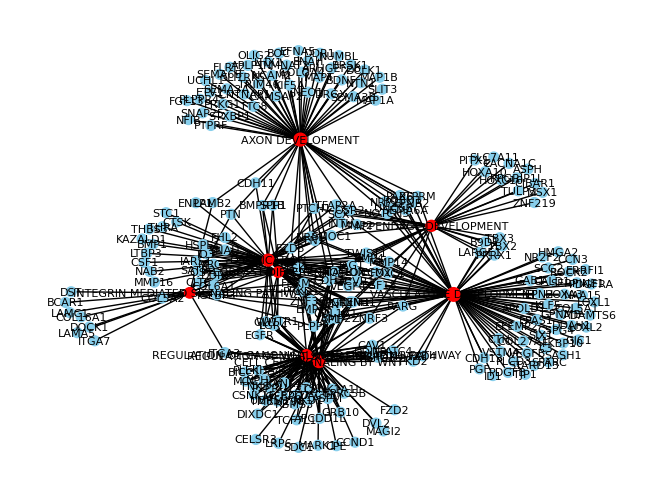

In [56]:
pos = nx.spring_layout(G, k=0.5/math.sqrt(G.order())) # Reordenar as posições dos nós

nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, font_size=8, font_color='black')
# Display the graph
plt.show()

In [57]:
## Genes hub da rede

In [58]:
hub, authority = nx.hits(G) #The HITS algorithm computes two numbers for a node. Authorities estimates the node value based on the incoming links.
                            #Hubs estimates the node value based on outgoing links.

In [59]:
dict(sorted(hub.items(), key=lambda item: item[1], reverse=True))

#3 hub genes: IL6, CD40, SOCS1

{'CELL CELL SIGNALING BY WNT': 0.5536871573652135,
 'VASCULATURE DEVELOPMENT': 0.5256751784854755,
 'REGULATION OF WNT SIGNALING PATHWAY': 0.47487584103549385,
 'OSSIFICATION': 0.41740808328101897,
 'REGULATION OF CANONICAL WNT SIGNALING PATHWAY': 0.4115098631064544,
 'OSTEOBLAST DIFFERENTIATION': 0.3159371914031495,
 'AXON DEVELOPMENT': 0.1799354167777613,
 'APPENDAGE DEVELOPMENT': 0.16558314798974968,
 'INTEGRIN MEDIATED SIGNALING PATHWAY': 0.06354931389412523,
 'DST': -0.0008290323071256567,
 'LAMA5': -0.0008290323071256567,
 'LAMC1': -0.0008290323071256567,
 'BCAR1': -0.0008290323071256567,
 'ITGA7': -0.0008290323071256567,
 'COL16A1': -0.0008290323071256567,
 'DOCK1': -0.0008290323071256567,
 'ZNF219': -0.002160114260679101,
 'CIBAR1': -0.002160114260679101,
 'MSX1': -0.002160114260679101,
 'SLC7A11': -0.002160114260679101,
 'TULP3': -0.002160114260679101,
 'CACNA1C': -0.002160114260679101,
 'RPGRIP1L': -0.002160114260679101,
 'ASPH': -0.002160114260679101,
 'PITX1': -0.0021601142

In [38]:
# Vamos exportar para melhor visualização no cytoscape

In [60]:
nx.write_gml(G, "Down_regulated_network_2.gml")

In [ ]:
#Deteção de comunidades

In [133]:
louvain_com = nx.community.louvain_communities(G, resolution=0.4, seed=123)

In [134]:
len(louvain_com)

3

In [135]:
louvain_com

[{'ACVR1',
  'APPENDAGE DEVELOPMENT',
  'ASPH',
  'B9D1',
  'BMP1',
  'BMP4',
  'BMPR1B',
  'CACNA1C',
  'CDH11',
  'CIBAR1',
  'CLTC',
  'COL5A2',
  'COL6A1',
  'CSF1',
  'CTSK',
  'DDR2',
  'ECM1',
  'ENPP1',
  'FGF18',
  'FHL2',
  'FOXC1',
  'HOXA10',
  'HOXC10',
  'HSPE1',
  'IARS1',
  'ID3',
  'IGFBP3',
  'INTU',
  'JAG1',
  'KAZALD1',
  'LARGE1',
  'LOX',
  'LTBP3',
  'MMP14',
  'MMP16',
  'MMP2',
  'MRC2',
  'MSX1',
  'NAB2',
  'OSR2',
  'OSSIFICATION',
  'OSTEOBLAST DIFFERENTIATION',
  'PITX1',
  'PRRX1',
  'PTCH1',
  'RARG',
  'RPGRIP1L',
  'SATB2',
  'SCX',
  'SLC7A11',
  'SMOC1',
  'SNAI1',
  'SPP1',
  'STC1',
  'TBX2',
  'TBX3',
  'TFAP2A',
  'THBS3',
  'THRA',
  'TULP3',
  'TWIST1',
  'VEGFC',
  'WNT4',
  'ZNF219'},
 {'APCDD1L',
  'ASPM',
  'BICC1',
  'BMP2',
  'CAV1',
  'CCND1',
  'CDH2',
  'CELL CELL SIGNALING BY WNT',
  'CELSR3',
  'COL1A1',
  'CPE',
  'CSNK1A1L',
  'CSNK1E',
  'CTNNB1',
  'DACT3',
  'DDIT3',
  'DIXDC1',
  'DVL2',
  'EGFR',
  'FZD2',
  'FZD7',
  'GLI1',

In [144]:
partition = dict()

In [180]:
ind = 1
partition = dict()
for set in louvain_com:

    if len(partition) == 0:
        partition = {label: "Community_" + str(ind) for label in set}
    else:
        partition_temp = {label: "Community_" + str(ind) for label in set}
        
        partition.update(partition_temp)
    ind += 1

In [181]:
#criar as comunidades no grafo
for node, community_id in partition.items():
    G.nodes[node]['community_id'] = community_id

In [154]:
nx.write_gml(G, "Down_regulated_network_with_community.gml")